In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from currency_converter import CurrencyConverter
import re

In [3]:
df = pd.read_csv('/home/zhenyakuklin/prod_0/data/_data.csv')

pd.set_option('display.max_columns',None)
df.head()


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [4]:
[r for r in df['Цена'].unique() if '$' in r]

['5000.0 $/ За месяц, Залог - 5409 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог - 10000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог - 10000 $, Срок аренды - Длительный',
 '25000.0 $/ За месяц, Залог - 25000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '10638.0 $/ За месяц, Залог - 10638 $, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог - 10000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '22000.0 $/ За месяц, Залог - 22000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '23000.0 $/ За месяц, Залог - 23000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '23000.0 $/ За месяц, З

In [5]:
df[['Тип','Дом','Ссылка на объявление']][df['Дом'].str.contains('Щитовой',case=False)]

,Тип,Дом,Ссылка на объявление
14786,Квартира,"3/9, Щитовой",https://www.cian.ru/rent/flat/274159016


In [6]:
df[df['Метро'].isna()]

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
189,189,271453191,4,Квартира,NaN,"Москва, улица Новый Арбат, 29",247.0/127.0/15.0,"13/17, Кирпичный",NaN,"500000.0 руб./ За месяц, Залог - 600000 руб., ...",+79161968762,С коллегами работаем на выгодных условиях. В а...,Дизайнерский,NaN,Балкон (1),Во двор,Раздельный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,NaN,3.00,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/271453191
233,233,167911714,1,Квартира,NaN,"Москва, 9-я Северная линия, 1К1, ш. Дмитровско...",38.8,"16/17, Панельный",наземная,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79680126196,Однокомнатная квартира с хорошим ремонтом и ит...,Дизайнерский,NaN,Балкон (1),На улицу,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,2.64,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/167911714
244,244,170068347,1,Квартира,NaN,"Москва, бульвар Академика Ландау, 3, ш. Дмитро...",41.0/20.0/12.0,"5/15, Кирпичный",наземная,"30000.0 руб./ За месяц, Залог - 30000 руб., Ко...",+79652875668,"Квартира в новом доме по Дмитровскому шоссе, с...",Евроремонт,19,Лоджия (1),Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Северный, 2017",NaN,NaN,"Пасс (2), Груз (2)",Да,https://www.cian.ru/rent/flat/170068347
267,267,186299640,1,Квартира,NaN,"Москва, Дмитровское шоссе, 165Дк6, ш. Дмитровс...",38.0/19.0/11.0,"3/17, Панельный",NaN,"32000.0 руб./ За месяц, Залог - 32000 руб., Ко...",+79660619245,Сдаю однокомнатную квартиру на длительный срок...,Косметический,19,Лоджия (1),Во двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,3.00,NaN,Да,https://www.cian.ru/rent/flat/186299640
745,745,274251220,1,Квартира,NaN,"Москва, улица Академика Янгеля, 2",45.0/24.0/12.0,"16/23, Монолитный",NaN,"40000.0 руб./ За месяц, Залог - 20 руб., Срок ...",+79660638799,"Сдаю однокомнатную квартиру г. Москва, ул. Ака...",Косметический,NaN,NaN,NaN,Раздельный (1),NaN,Интернет,М-House,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274251220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22713,22713,271949078,1,Квартира,NaN,"Санкт-Петербург, пос. Шушары, Ленсоветовский т...",42.0/17.0/13.7,"8/10, Панельный",NaN,"14000.0 руб./ За месяц, Залог - 1 руб., Срок а...",+79819895449,Сдаётся просторная евродвушка в новом доме ЖК ...,Без ремонта,NaN,Балкон (1),NaN,NaN,"Можно с детьми, Можно с животными",NaN,Добрыня,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/271949078
22715,22715,274882879,1,Квартира,NaN,"Санкт-Петербург, Пушкин, Школьная улица, 63, ш...",32.0/18.0/5.5,"5/5, Кирпичный",NaN,"13000.0 руб./ За месяц, Сумма коммунальных пла...",+79819504808,сдается на длительный срок уютная чистая светл...,Косметический,18,Балкон (1),На улицу,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274882879
22723,22723,268161801,1,Квартира,NaN,"Санкт-Петербург, пос. Шушары, Ленсоветовский т...",41.0/18.0/11.0,"8/10, Панельный",NaN,"16000.0 руб./ За месяц, Сумма коммунальных пла...",+79811660787,1 комнатная квартира для 1-3 человек.Возможно ...,Косметический,18,Лоджия (1),Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Душевая ка...","Ленсоветовский, 2012",NaN,NaN,Пасс (1),NaN,https://www.cian.ru/rent/flat/268161801
23273,23273,273795912,1,Квартира,NaN,"Москва, Боровский проезд, 24, ш. Боровское (4 ...",36.0,7/12,открытая,"33000.0 руб./ За месяц, Срок аренды - Длительн...",+79660563375,"Квартира сдаётся с Яндекс Арендой, а значит вс...",Косметический,NaN,Лоджия (1),Во двор,Совмещенный (1),Можно с детьми,"Стиральная 

In [7]:
pd.set_option('max_colwidth', None)
df.tail()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79154383401,"Сдаётся светлая теплая квартира (студия) с балкон и хорошим свежим ремонтом. Есть вся необходимая мебель и техника. На этаже имеется колясочная. Закрытый охраняемый двор. Вся инфраструктура на территории ЖК ( магазины , кафе, аптеки, салоны красоты), 5 минут пешком до метро Говорово, рядом автобусная остановка до метро Юго-Западня. Так же рядом парк ""Мещерский Лес"", в котором есть пляж и пруд. Квартира сдается на длительный срок. Аренда от собственника! Без комиссии!, 10 фото",Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Кондиционер, Холодильник, Интернет",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79151173402,"Сдам однокомнатную квартиру на длительный срок. Метро Солнцево, ЖК ""Лучи"".\nУкомплектована бытовой техникой и мебелью. Сдача от собственника. Сдам гражданам России -для одного человека или семейной пары без детей и животных.\nРиэлторов прошу не беспокоить., 7 фото",Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Телевизор, Холодильник",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79653825192,"Рассматриваются квартиранты только славяне и только на длительный срок.\nБез животных.\nИдеальная квартира для двоих. Одна комната изолированная, вторая объединена с кухонной зоной.\nСдается очень уютная и светлая двухкомнатная квартира в экологически чистом районе Москвы. 5 минут пешком до станции метро Солнцево, либо до ж/д станции ""Солнечная"". \nНесомненным плюсом является отсутствие соседей сверху. Всегда есть парковочные места возле дома. В районе много зелени, через дорогу зона отдыха с прудом, фитнес-центр. В шаговой доступности Мещерский парк. В шаговой доступности имеется несколько школ, детских садов, торгово-развлекательных центров. \nКвартира очень теплая. Сделан качественный капитальный ремонт в теплых тонах. Пластиковые стеклопакеты на окнах, балкон холодный, застеклен. \nНа данный момент квартира сдается без спальной мебели (без дивана и кровати) и телевизора.\nМебель:\n- кухонный гарнитур\n- шкаф для верхней одежды\n- шкаф в спальне\nКомплект техники:\n- встраиваемые холодильник и ..., 21 фото",Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная машина, Кондиционер, Холодильник, Интернет",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 2 мес",+79660611965,"Двухкомнатная уютная квартира с видо

In [8]:
df.groupby('Адрес').count()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
Адрес,,,,,,,,,,,,,,,,,,,,,,,,
"Краснодарский край, Сочи, Агро СНТ, 54",1,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1
"Краснодарский край, Сочи, Адлер жилрайон, Курортный Городок мкр",1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1
"Краснодарский край, Сочи, Адлер жилрайон, переулок Аэровокзальный, 1",1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1
"Краснодарский край, Сочи, Адлер жилрайон, переулок Белорусский, 10",1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1
"Краснодарский край, Сочи, Адлер жилрайон, переулок Ереванский, 4",1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Санкт-Петербург, шоссе Революции, 37К1",1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1
"Санкт-Петербург, шоссе Суздальское, 12, ш. Выборгское (8 км до МКАД)",1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1
"Санкт-Петербург, шоссе Суздальское, 22к4, ш. Выборгское (9 км до МКАД)",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1


In [9]:
df.info

<bound method DataFrame.info of        Unnamed: 0  ID  объявления Количество комнат       Тип  \
0               0       271271157                 4  Квартира   
1               1       271634126                 4  Квартира   
2               2       271173086   4, Оба варианта  Квартира   
3               3       272197456   4, Оба варианта  Квартира   
4               4       273614615                 2  Квартира   
...           ...             ...               ...       ...   
23363       23363       215565511               NaN  Квартира   
23364       23364       274654844                 1  Квартира   
23365       23365       268679909   2, Оба варианта  Квартира   
23366       23366       274807525                 2  Квартира   
23367       23367       274672243   2, Оба варианта  Квартира   

                              Метро  \
0      м. Смоленская (9 мин пешком)   
1      м. Смоленская (8 мин пешком)   
2      м. Смоленская (7 мин пешком)   
3      м. Смоленская (3 мин пеш

In [10]:
df['Парковка'].unique()


array(['подземная', nan, 'наземная', 'открытая', 'многоуровневая',
       'на крыше'], dtype=object)

In [11]:
df['Балкон'].unique()

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (1), Лоджия (3)', 'Балкон (4)',
       'Лоджия (4)', 'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)'],
      dtype=object)

In [12]:
len(df['Адрес'].unique())

12850

In [13]:
df["Ремонт"].unique()

df["Ремонт"].isna().sum()

df["Ремонт"] = df["Ремонт"].fillna('Без ремонта')

In [14]:
df["Ремонт"].isna().sum()

np.int64(0)

In [15]:
df['Окна'].unique()

array([nan, 'На улицу и двор', 'Во двор', 'На улицу'], dtype=object)

In [16]:
df['Название ЖК'].unique()

array(['Новый Арбат, 2010', 'Новый Арбат', nan, ..., 'Лучи, 2019',
       'В Солнцево, 2013', 'В Солнцево'], shape=(1799,), dtype=object)

In [17]:
df['Санузел'].unique()

array([nan, 'Совмещенный (2), Раздельный (1)', 'Совмещенный (3)',
       'Совмещенный (2)', 'Совмещенный (1), Раздельный (1)',
       'Совмещенный (1)', 'Совмещенный (2), Раздельный (2)',
       'Раздельный (2)', 'Раздельный (1)', 'Раздельный (3)',
       'Совмещенный (4)', 'Совмещенный (3), Раздельный (1)',
       'Раздельный (4)', 'Совмещенный (1), Раздельный (2)',
       'Совмещенный (2), Раздельный (4)',
       'Совмещенный (1), Раздельный (3)',
       'Совмещенный (3), Раздельный (3)',
       'Совмещенный (4), Раздельный (2)',
       'Совмещенный (2), Раздельный (3)',
       'Совмещенный (4), Раздельный (1)',
       'Совмещенный (3), Раздельный (2)'], dtype=object)

In [18]:
df['Можно с детьми/животными'].unique()

array(['Можно с детьми, Можно с животными', 'Можно с детьми',
       'Можно с животными', nan], dtype=object)

In [19]:
df['Дополнительно'].unique()

array(['Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник',
       'Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Холодильник, Интернет',
       'Мебель на кухне, Ванна, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник,

In [20]:
df.groupby('Название ЖК')[['Адрес']].count()

,Адрес
Название ЖК,
1147,7
"1147, 2019",7
"1147, 2020",1
"17-й пр-д Марьиной Рощи, 2015",3
4YOU,1
...,...
"е.квартал ""Мир внутри"", 2017",2
"е.квартал ""Мир внутри"", 2018",1
"мой адрес В Зеленограде, 2013",1


In [21]:
df.groupby('Адрес')[['Название ЖК']].count()

,Название ЖК
Адрес,
"Краснодарский край, Сочи, Агро СНТ, 54",0
"Краснодарский край, Сочи, Адлер жилрайон, Курортный Городок мкр",0
"Краснодарский край, Сочи, Адлер жилрайон, переулок Аэровокзальный, 1",0
"Краснодарский край, Сочи, Адлер жилрайон, переулок Белорусский, 10",0
"Краснодарский край, Сочи, Адлер жилрайон, переулок Ереванский, 4",0
...,...
"Санкт-Петербург, шоссе Революции, 37К1",0
"Санкт-Петербург, шоссе Суздальское, 12, ш. Выборгское (8 км до МКАД)",1
"Санкт-Петербург, шоссе Суздальское, 22к4, ш. Выборгское (9 км до МКАД)",1


In [22]:
df['Высота потолков, м'].unique()

array([  3.  ,   3.5 ,   3.2 ,   3.9 ,    nan, 310.  ,   3.3 ,   4.  ,
         3.15,   4.15,   3.8 ,   3.35,   4.05,   3.6 ,   3.1 ,   4.2 ,
         2.8 ,   5.5 ,   2.5 ,   3.4 ,   2.4 ,   2.74,   2.6 ,   2.7 ,
         2.64,   2.75, 260.  ,   2.48,   2.52,   2.77,   2.78,   6.  ,
         2.95,   2.43,   2.9 ,   2.65,   2.54,   2.55,   2.72,   2.85,
         2.  ,   2.84,   2.58,   3.7 ,   4.6 ,   2.66,   2.68,   2.73,
        28.  ,   5.  ,   3.25,   4.5 , 264.  ,   2.57,  27.  ,   2.3 ,
         3.05,   3.07,   3.92,   2.86,   2.93,   2.94,   3.55,   2.67,
        12.8 ,   4.1 ,  26.  ,   2.76,   2.62,   2.87,   5.1 , 320.  ,
         4.7 , 265.  ,   2.56,   9.  ,   2.51,   2.63,   2.88,   2.81,
         3.08,   3.11,   5.8 ,   2.2 ,   2.45,   2.97,  25.  ,   2.1 ,
       280.  ,   3.56,   2.99,   3.41,   3.24,   3.21,   1.2 ,   3.02])

In [23]:
df['Лифт'].unique()

array(['Пасс (4), Груз (1)', 'Пасс (1), Груз (1)', 'Пасс (1)', nan,
       'Пасс (3)', 'Пасс (4)', 'Пасс (2), Груз (1)', 'Пасс (2)',
       'Пасс (2), Груз (2)', 'Пасс (3), Груз (3)', 'Груз (4)',
       'Пасс (3), Груз (1)', 'Груз (1)', 'Пасс (1), Груз (2)', 'Груз (2)',
       'Пасс (3), Груз (2)', 'Пасс (4), Груз (4)', 'Пасс (2), Груз (3)',
       'Пасс (4), Груз (2)', 'Груз (3)', 'Пасс (1), Груз (3)',
       'Пасс (4), Груз (3)', 'Пасс (5), Груз (1)', 'Пасс (1), Груз (12)',
       'Пасс (60)', 'Пасс (6)', 'Пасс (8), Груз (8)', 'Пасс (7)',
       'Пасс (1), Груз (4)', 'Пасс (50)', 'Пасс (5), Груз (3)',
       'Пасс (2), Груз (4)', 'Груз (6)', 'Груз (8)', 'Пасс (5)'],
      dtype=object)

In [24]:
df.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [25]:
df.reindex().head(2)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79166369231,"Без комиссии для нанимателя! Бонус коллегам 125.000 руб! Предлагается роскошная четырехкомнатная квартира в ЖК Новый Арбат. \nКвартира укомплектована мебелью и техникой премиум-класса. Кондиционирование, теплые полы. \n\nФункциональная планировка: изолированная кухня, гостиная, три спальни, два совмещенных санузла с ванной и душем, гардеробная, прихожая с гостевым санузлом и постирочной. \n\nДом находится под круглосуточной охраной. В подземном паркинге в стоимость включено 1 м/м. Рядом есть вся необходимая инфраструктура., 26 фото",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79850608590,"Лот 93107. Елена Анисимова.\n\nБонус агенту 50%.\n\nБез комиссии для арендатора.\n\nСтильная 4-комнатная квартира в элитном доме 5 / 16 этаж. Спален: 3, санузлов: 3. Общая площадь: 198 кв.м. Комнаты: 25-25-20-25 кв.м. Кухня: 18 кв.м. Высота потолков 3.5 м. Ремонт в уникальном авторском стиле. Квартира полностью с мебелью, вывоз обсуждается. Огороженная, охраняемая территория. Подземный паркинг, машиноместо входит в стоимость. Окна выходят на обе стороны. Есть гардеробная комната. В наличии: посудомоечная машина, холодильник, кондиционер, бойлер, душевая кабина, ванна, постирочная комната, стиральная машина, сушильная машина, подогрев полов. Телевизор, кабельное тв, высокоскоростной интернет. Можно со взрослыми детьми. Возможна оплата по безналу.\n\nЕсть презентации в pdf на русском или английском для партнеров., Возможен торг, Взаимная симпатия, 19 фото",Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126


In [26]:
df['ID  объявления'].nunique()
# Проверка на уникальность id, пришли к выводу что таим образом дубликаты не найти, потому что каждое объявление имеет уникальный номер объявления.

23368

In [27]:
df_moscow = df[df['Адрес'].str.lower().str.contains('москва')]
df_moscow.head(2)



,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79166369231,"Без комиссии для нанимателя! Бонус коллегам 125.000 руб! Предлагается роскошная четырехкомнатная квартира в ЖК Новый Арбат. \nКвартира укомплектована мебелью и техникой премиум-класса. Кондиционирование, теплые полы. \n\nФункциональная планировка: изолированная кухня, гостиная, три спальни, два совмещенных санузла с ванной и душем, гардеробная, прихожая с гостевым санузлом и постирочной. \n\nДом находится под круглосуточной охраной. В подземном паркинге в стоимость включено 1 м/м. Рядом есть вся необходимая инфраструктура., 26 фото",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79850608590,"Лот 93107. Елена Анисимова.\n\nБонус агенту 50%.\n\nБез комиссии для арендатора.\n\nСтильная 4-комнатная квартира в элитном доме 5 / 16 этаж. Спален: 3, санузлов: 3. Общая площадь: 198 кв.м. Комнаты: 25-25-20-25 кв.м. Кухня: 18 кв.м. Высота потолков 3.5 м. Ремонт в уникальном авторском стиле. Квартира полностью с мебелью, вывоз обсуждается. Огороженная, охраняемая территория. Подземный паркинг, машиноместо входит в стоимость. Окна выходят на обе стороны. Есть гардеробная комната. В наличии: посудомоечная машина, холодильник, кондиционер, бойлер, душевая кабина, ванна, постирочная комната, стиральная машина, сушильная машина, подогрев полов. Телевизор, кабельное тв, высокоскоростной интернет. Можно со взрослыми детьми. Возможна оплата по безналу.\n\nЕсть презентации в pdf на русском или английском для партнеров., Возможен торг, Взаимная симпатия, 19 фото",Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126


In [28]:
#Удаляем неинформативные Series
df1= df_moscow.copy()
df1 = df1.drop(columns=['Дополнительно','Описание','Unnamed: 0','Телефоны','Тип','Название ЖК','Площадь комнат, м2','Серия дома','Ссылка на объявление'])
df1.set_index(['ID  объявления'],inplace=True)
df1.head(2)


,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,"Высота потолков, м",Лифт,Мусоропровод
ID объявления,,,,,,,,,,,,,,,
271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными",3.0,"Пасс (4), Груз (1)",Да
271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,3.5,"Пасс (1), Груз (1)",Нет


In [29]:
num = df1['Балкон'].isna().sum().tolist()
num

6630

In [30]:
df1


,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,"Высота потолков, м",Лифт,Мусоропровод
ID объявления,,,,,,,,,,,,,,,
271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными",3.00,"Пасс (4), Груз (1)",Да
271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,3.50,"Пасс (1), Груз (1)",Нет
271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,3.20,Пасс (1),NaN
272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,3.20,Пасс (1),NaN
273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,3.90,"Пасс (1), Груз (1)",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,NaN,"Пасс (1), Груз (1)",NaN
274654844,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,NaN,"Пасс (1), Груз (1)",NaN
268679909,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN,NaN,NaN


In [31]:
#Вывожу в столбец количество пропущенных значений в каждой колонке

print(f"""Количество пропущенных значений в колонках в процентах '{df1.columns[0]}': {df1.isnull().sum()*100/19737}""")

Количество пропущенных значений в колонках в процентах 'Количество комнат': Количество комнат            2.710645
Метро                        1.753053
Адрес                        0.000000
Площадь, м2                  0.000000
Дом                          0.000000
Парковка                    56.614480
Цена                         0.000000
Ремонт                       0.000000
Балкон                      33.591731
Окна                        26.093125
Санузел                     10.340984
Можно с детьми/животными    24.902467
Высота потолков, м          46.623094
Лифт                        21.239297
Мусоропровод                40.568475
dtype: float64


Мы видим в каких столбцах значение NaN превышает 40% и принимаем решение удалить эти Series, так как будет не информативно заполнять их средней/модой/медианой. 

In [32]:
df1 = df1.drop(columns=['Парковка','Высота потолков, м','Мусоропровод'])
df1

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт
ID объявления,,,,,,,,,,,,
271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)"
271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)"
271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1)
272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1)
273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный","225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Пасс (1), Груз (1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,"42000.0 руб./ За месяц, Залог - 42000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
274654844,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный","45000.0 руб./ За месяц, Залог - 45000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
268679909,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный","50000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN


In [33]:
df_m = df1.copy()
df_m['Метро'] =  df_m['Метро'].astype('str')
df_m['Метро'] =  df_m['Метро'].apply(lambda x: x[:x.find('(')])
df_m

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт
ID объявления,,,,,,,,,,,,
271271157,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)"
271634126,4,м. Смоленская,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)"
271173086,"4, Оба варианта",м. Смоленская,"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1)
272197456,"4, Оба варианта",м. Смоленская,"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1)
273614615,2,м. Арбатская,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный","225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Пасс (1), Груз (1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,NaN,м. Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,"42000.0 руб./ За месяц, Залог - 42000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
274654844,1,м. Солнцево,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный","45000.0 руб./ За месяц, Залог - 45000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
268679909,"2, Оба варианта",м. Солнцево,"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный","50000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN


In [34]:
df_m['Метро'].nunique()


278

In [35]:
uniq_m = df_m['Метро'].value_counts().head(10)
un_m = uniq_m.drop('na')
nf = un_m.to_frame()
nf

,count
Метро,
м. Селигерская,393
м. Щелковская,313
м. Бабушкинская,284
м. Новогиреево,282
м. Коломенская,273
м. Водный стадион,220
м. Проспект Вернадского,214
м. Медведково,213
м. Сокол,208


Мы заметили что есть значение "na", и оно не относится к названию станции метро

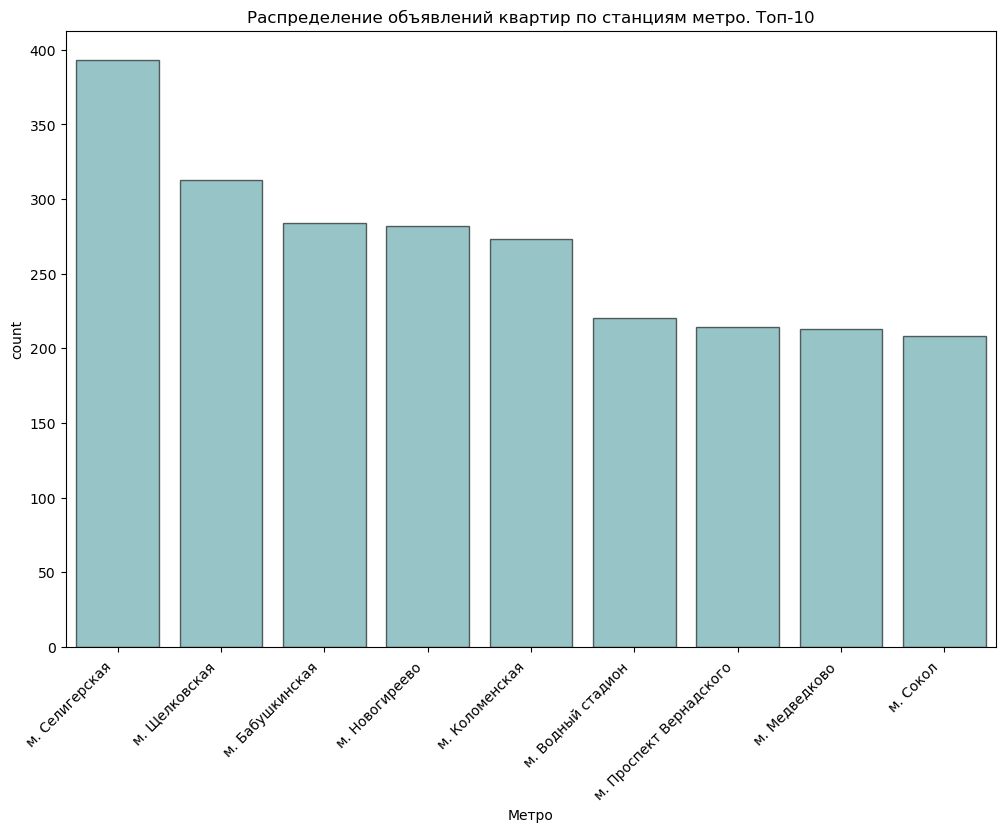

In [36]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=nf, x= 'Метро',y='count', color='#45aaae',edgecolor='black', alpha=0.6)
plt.title('Распределение объявлений квартир по станциям метро. Топ-10')
plt.xticks(rotation=45,ha='right')
plt.show()


In [37]:
#Делаем график скатерплот завимости цены квартиры от площади квартиры. Цвет шарика зависит от типа ремонта

In [38]:
# df_m['Площадь, м2'] =  df_m['Площадь, м2'].astype('str')
# df_m['Площадь, м2'] =  df_m['Площадь, м2'].apply(lambda x: x.split('/')[0] if '/' in x else x) 

# # [:x.find('/')].strip('.')

df_m['Площадь, м2'] = df_m['Площадь, м2'].astype('str')
df_m['Площадь, м2'] = df_m['Площадь, м2'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df_m['Площадь, м2'] =  df_m['Площадь, м2'].astype('float')


In [39]:
def sale(text):
  if text.split(' ')[1] == 'руб./':
    result = float(text.split(' ')[0])
  elif text.split(' ')[1] == '$/':
    result = float(text.split(' ')[0])*82.17
  elif text.split(' ')[1] == '€/':
    result = float(text.split(' ')[0])*93.45
  return result


df_m['Цена'] = df_m['Цена'].astype('str')
df_m['Цена'] = df_m['Цена'].apply(sale)
df_m['Цена'] =  df_m['Цена'].astype('float')

df_m['Цена']

ID  объявления
271271157    500000.0
271634126    500000.0
271173086    500000.0
272197456    400000.0
273614615    225000.0
               ...   
215565511     42000.0
274654844     45000.0
268679909     50000.0
274807525     55000.0
274672243     57000.0
Name: Цена, Length: 19737, dtype: float64

In [40]:
df_m['Цена']

ID  объявления
271271157    500000.0
271634126    500000.0
271173086    500000.0
272197456    400000.0
273614615    225000.0
               ...   
215565511     42000.0
274654844     45000.0
268679909     50000.0
274807525     55000.0
274672243     57000.0
Name: Цена, Length: 19737, dtype: float64

In [41]:
df_m['Площадь, м2']

ID  объявления
271271157    200.0
271634126    198.0
271173086    200.0
272197456    170.0
273614615     58.0
             ...  
215565511     35.0
274654844     38.7
268679909     43.1
274807525     52.5
274672243     90.0
Name: Площадь, м2, Length: 19737, dtype: float64

Text(0.5, 1.0, 'Зависимость цены аренды квартиры от ремонта')

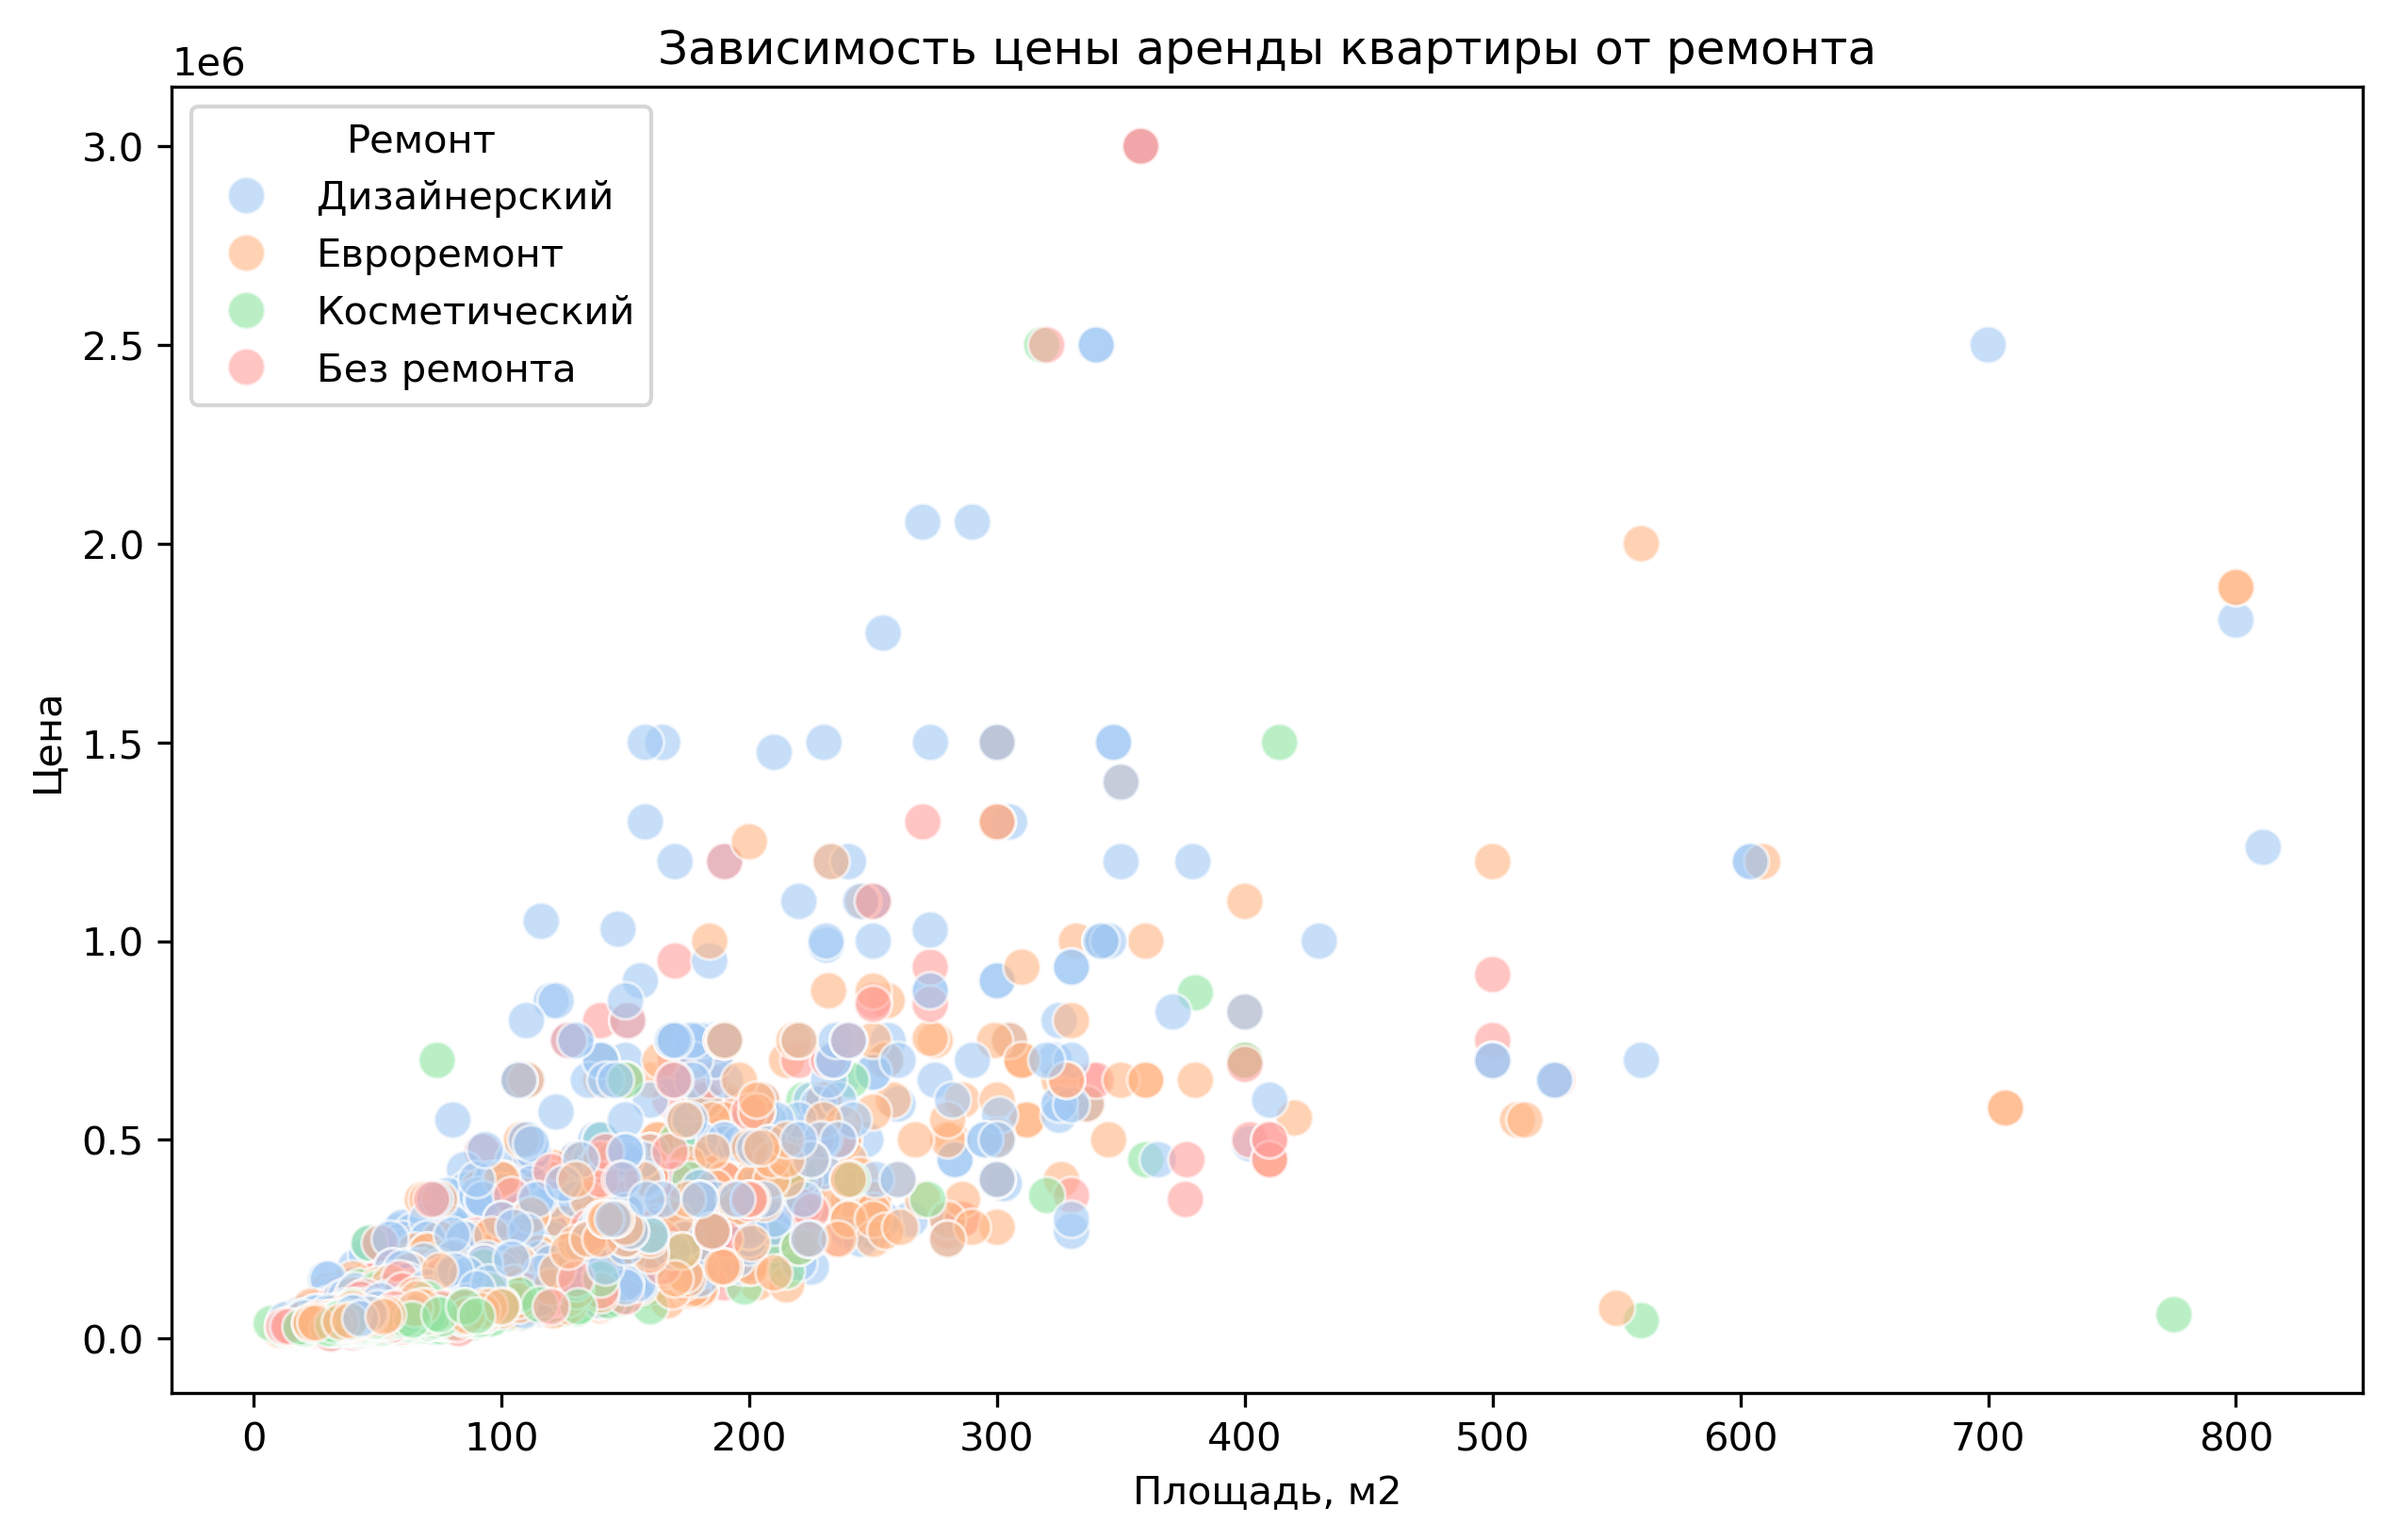

In [42]:
plt.figure(figsize=(10,6),dpi=300)
sns.scatterplot(data= df_m, x= 'Площадь, м2', y = 'Цена', hue='Ремонт', s= 90, alpha=0.6, palette='pastel')
plt.title('Зависимость цены аренды квартиры от ремонта')
# """Как мы видим на графике есмь множество выбросов с очень большой стоимостью аренды, 
# так же можем отметить, что как правило квартиры с евроремонтом и дизайнерским ремонтом сдаются за большую стоимость"""

In [43]:
# Рассмотрим соотношение квартир по станциям метро и по наличию ремонта в них
pd.crosstab(df_m['Метро'],df_m['Ремонт']).head(15).drop('na')
#здесь мы снова встретили пустое значение "na" и убрали его чтоб были результаты наглядней


Ремонт,Без ремонта,Дизайнерский,Евроремонт,Косметический
Метро,,,,
м. Авиамоторная,23,20,49,15
м. Автозаводская,11,5,26,15
м. Академическая,27,22,63,79
м. Александровский сад,0,0,3,0
м. Алексеевская,20,37,64,50
м. Алма-Атинская,8,5,20,35
м. Алтуфьево,16,13,53,87
м. Аминьевская,11,5,10,22
м. Андроновка,1,2,7,3


In [44]:
metro= df_m.groupby('Метро')[['Цена']].sum().sort_values(by='Цена', ascending=False).reset_index().head(15)
metro

,Метро,Цена
0,м. Кропоткинская,45381949.00
1,м. Парк Культуры,45104250.00
2,м. Смоленская,41342000.00
3,м. Сокол,40726759.00
4,м. Крылатское,28945489.00
5,м. Арбатская,28295000.00
6,м. Проспект Вернадского,26303310.00
7,м. Новокузнецкая,25316000.00
8,м. Маяковская,24154124.46
9,м. Водный стадион,22797245.00


/tmp/ipykernel_30679/3482946215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= metro, x= 'Метро', y = 'Цена', alpha=0.6, palette='pastel')


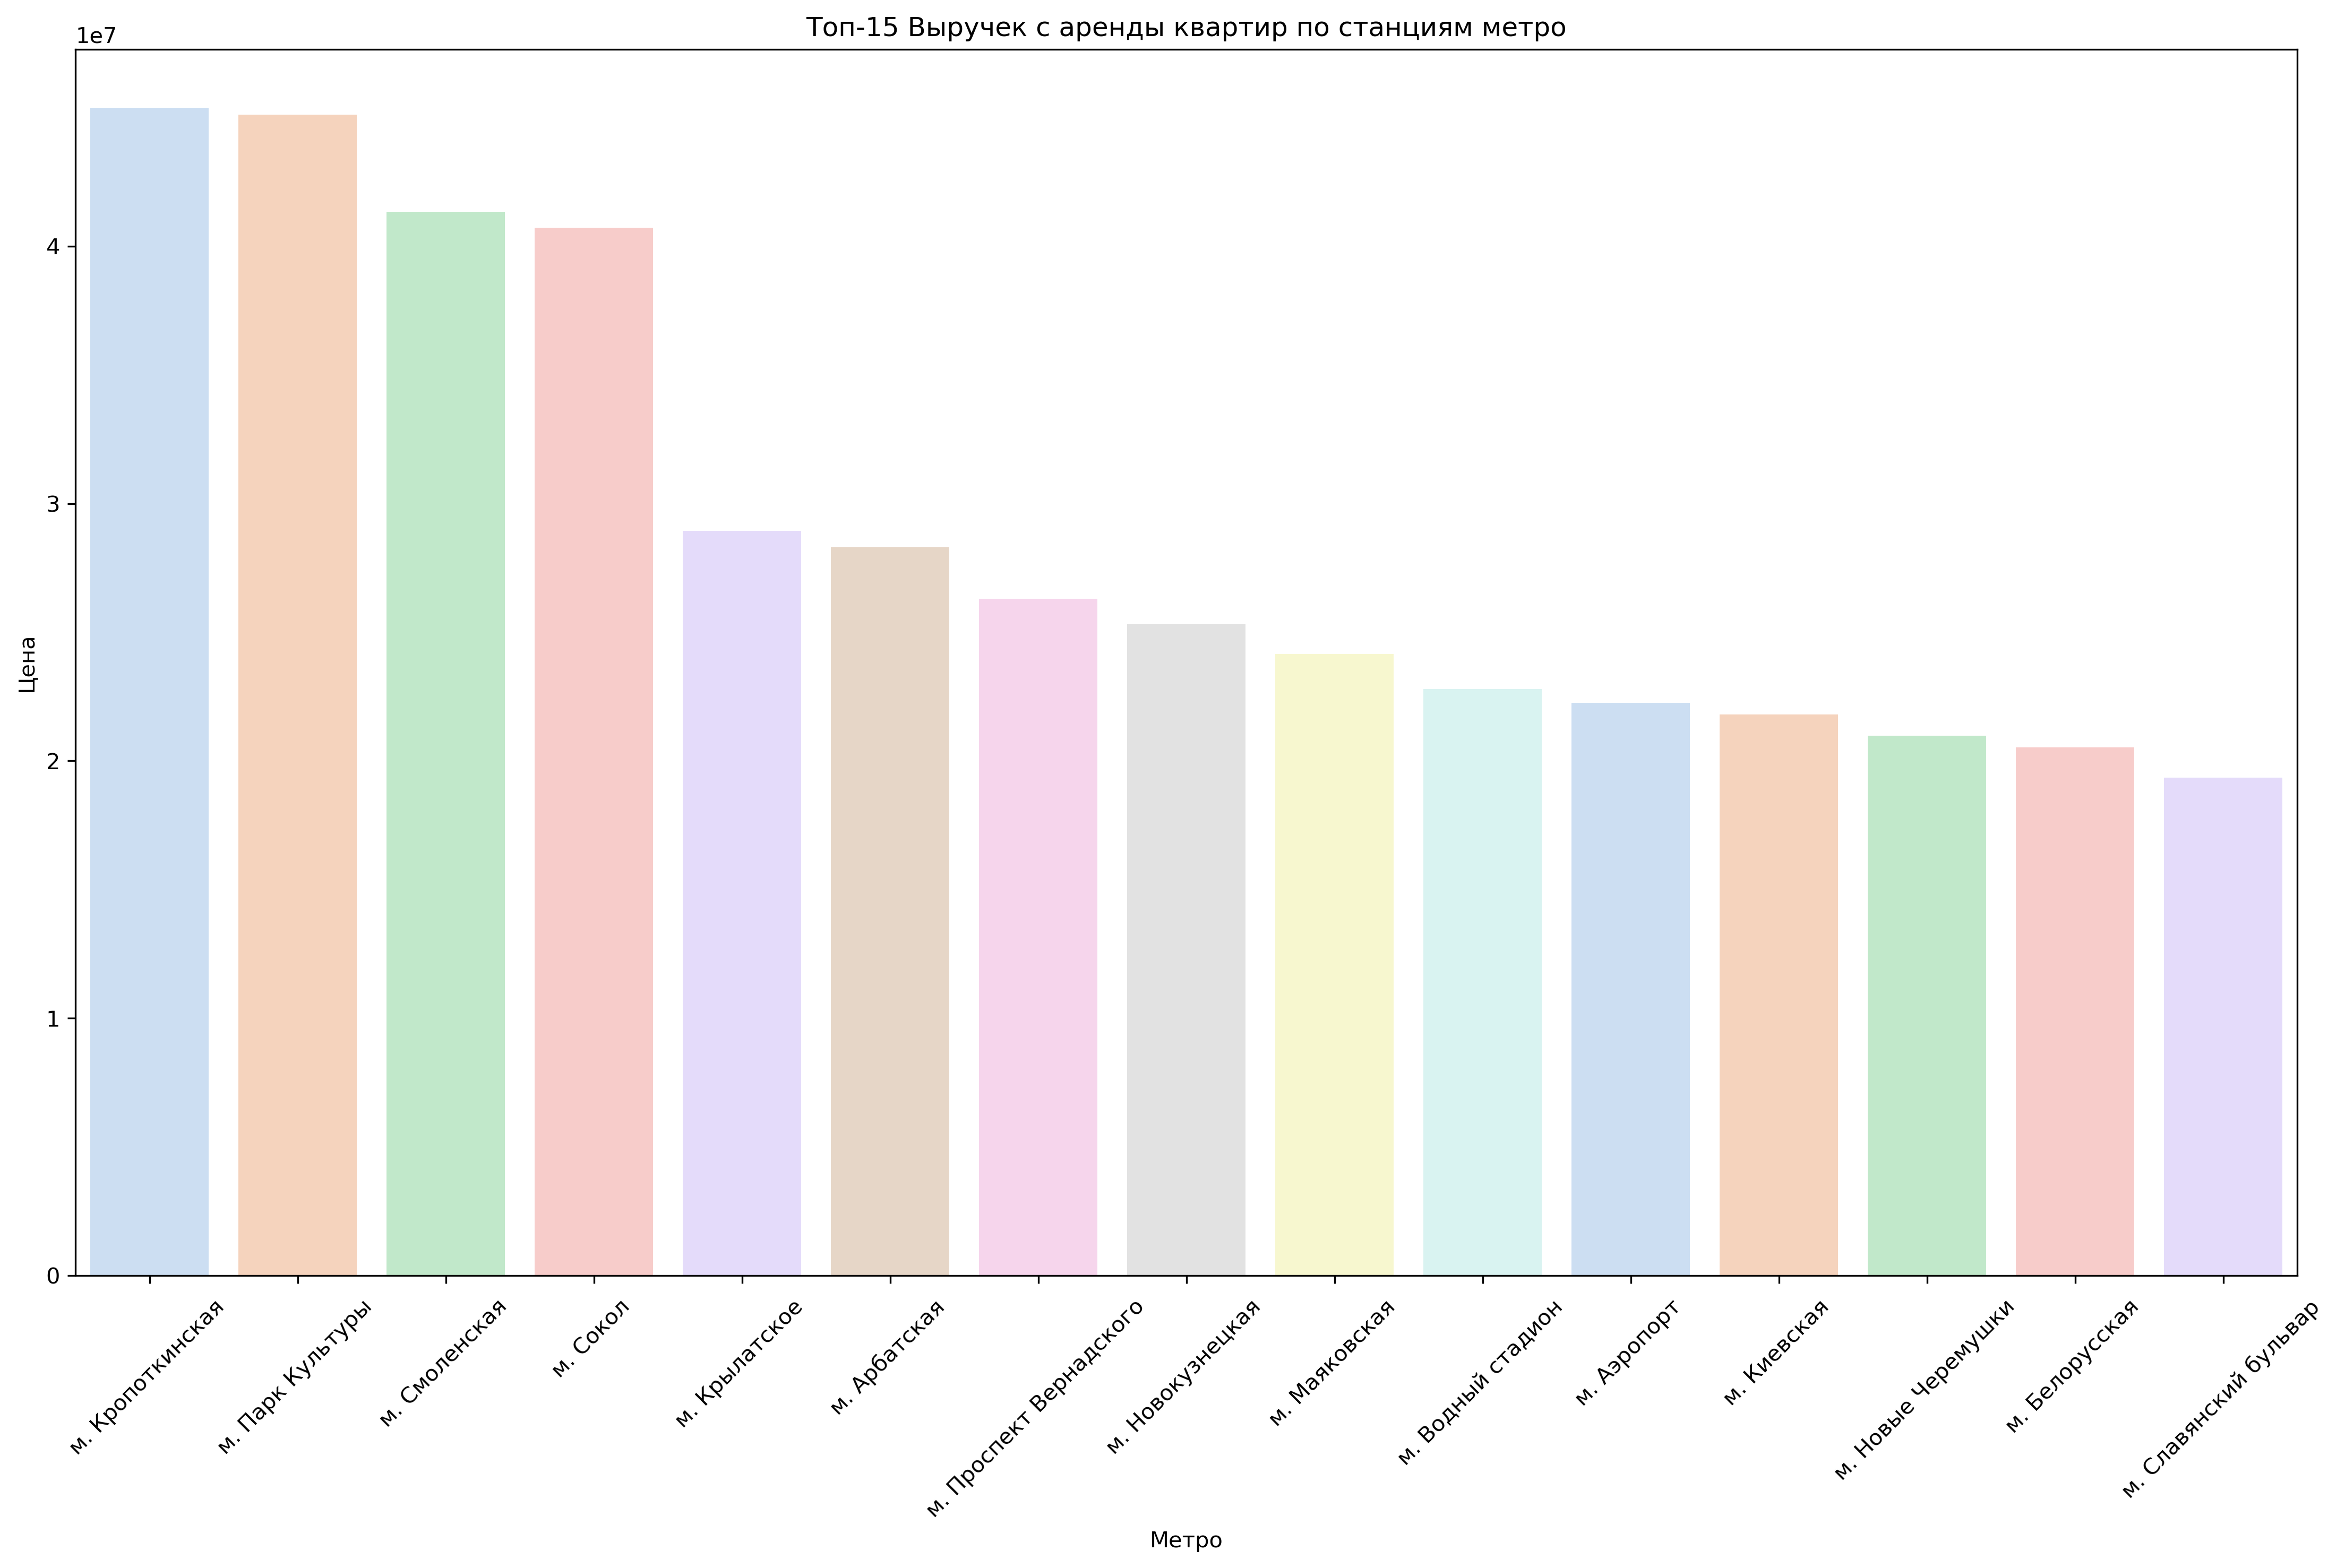

In [45]:
plt.figure(figsize=(18,10),dpi=300)
sns.barplot(data= metro, x= 'Метро', y = 'Цена', alpha=0.6, palette='pastel')
plt.title('Топ-15 Выручек с аренды квартир по станциям метро')
plt.xticks(rotation=45);

In [46]:
#Найдем соотношение количества объявлений в зависимости от количества комнат
#для начала нужно привести к целочисленному виду "Количество комнат"

In [47]:
df_m['Количество комнат'] = df_m['Количество комнат'].astype('str')
df_m['Количество комнат'] = df_m['Количество комнат'].apply(lambda x: x.split(',')[0] if ',' in x else x)

#rooms = df_m[df_m['Количество комнат'] != 'nan'].copy()
df_m['Количество комнат']= df_m['Количество комнат'].replace('nan','0').astype('int')
# #rooms['Количество комнат'] =  ['Количество комнат'].astype('int')
# rooms
df_m

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт
ID объявления,,,,,,,,,,,,
271271157,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",500000.0,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)"
271634126,4,м. Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",500000.0,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)"
271173086,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,500000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1)
272197456,4,м. Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,400000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1)
273614615,2,м. Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",225000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Пасс (1), Груз (1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,0,м. Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0,10/14,42000.0,Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
274654844,1,м. Солнцево,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7,"5/18, Монолитный",45000.0,Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
268679909,2,м. Солнцево,"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",50000.0,Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN


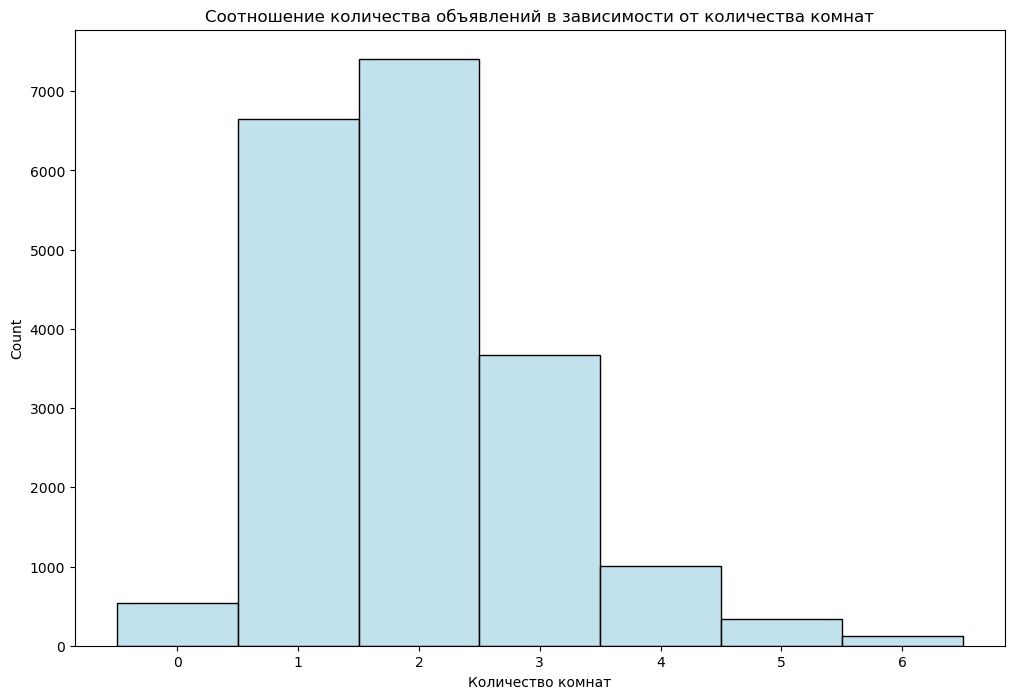

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_m, x='Количество комнат', color='lightblue', binwidth=1,discrete=True)
plt.title('Cоотношение количества объявлений в зависимости от количества комнат')
plt.show()

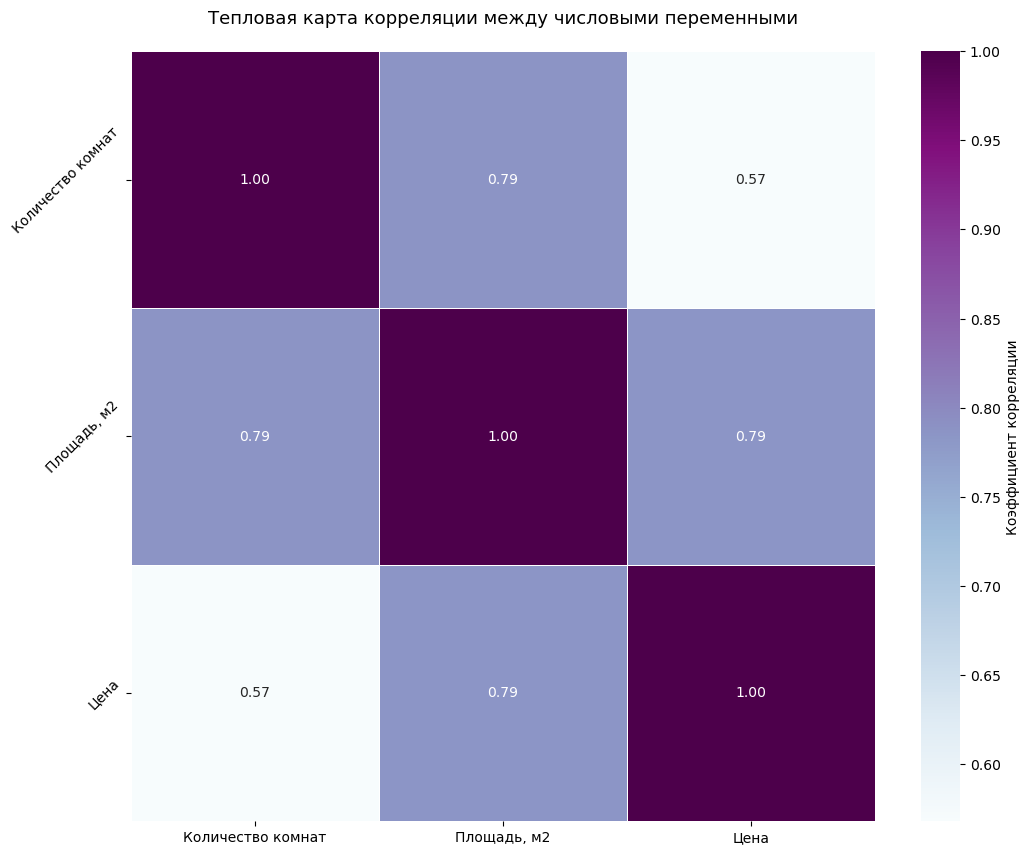

In [49]:
corr_m = df_m.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10),dpi=100)
sns.heatmap(corr_m,
            annot=True,
            fmt='.2f',
            cmap='BuPu',
            linewidths=0.5,
            cbar_kws={'label':'Коэффициент корреляции'})

plt.title('Тепловая карта корреляции между числовыми переменными',fontsize=13, pad=20)
plt.yticks(rotation=45 ,va='center')


plt.show()

In [50]:
df_m.reset_index(inplace=True)

ns = [
    'Ad_ID',
    'Number_of_rooms',
    'Metro',
    'Address',
    'Area_m2', 
    'House',
    'Price',
    'Repair',
    'Balcony',
    'Windows',
    'Bathroom',
    'Children/pets_allowed',
    'Elevator'
    ]

In [51]:
for k,v in zip(df_m.columns.to_list(), ns):
    df_m.rename(columns={k: v}, inplace=True)
                       
df_m

,Ad_ID,Number_of_rooms,Metro,Address,Area_m2,House,Price,Repair,Balcony,Windows,Bathroom,Children/pets_allowed,Elevator
0,271271157,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",500000.0,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)"
1,271634126,4,м. Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",500000.0,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)"
2,271173086,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,500000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1)
3,272197456,4,м. Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,400000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1)
4,273614615,2,м. Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",225000.0,Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Пасс (1), Груз (1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,215565511,0,м. Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0,10/14,42000.0,Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
19733,274654844,1,м. Солнцево,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7,"5/18, Монолитный",45000.0,Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
19734,268679909,2,м. Солнцево,"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",50000.0,Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN
19735,274807525,2,м. Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",52.5,"8/23, Монолитный",55000.0,Евроремонт,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,Пасс (3)


In [52]:
df_m.set_index('Ad_ID', inplace=True)

In [53]:
df_m['Floor flat'] = df_m['House'].apply(lambda x: x[:x.index('/')])

In [54]:
df_m['Design'] = df_m['House'].apply(lambda x: x[x.index(',')+1:] if ',' in x else None)


In [55]:
df_m['Number of storeys in the house'] = df_m['House'].apply(lambda x: x[x.index('/')+1:x.index(',')]if ',' in x else x[x.index('/')+1:])

In [56]:
del df_m['House']

In [57]:
df_m['Children/pets_allowed'] = df_m['Children/pets_allowed'].fillna('Без детей и животных')

In [58]:
df_m['Metro'] = df_m['Metro'].fillna(df_m['Metro'].mode())

In [59]:
df_m['Bathroom'] = df_m['Bathroom'].astype('string')
df_m['Bathroom'] = df_m['Bathroom'].fillna(df_m['Bathroom'].mode()[0])

In [60]:
df_m['Bathroom'].isna().sum()

np.int64(0)

In [61]:
# df_m['Bathroom'] = df_m['Bathroom'].astype('string')
# c = df_m['Bathroom'].apply(lambda x: 1 if 'Совмещенный' in x else 0)
df_m['Bathroom_separated'] = [1 if 'Раздельный' in c else 0 for c in df_m['Bathroom']]

In [62]:
df_m['Bathroom_combined'] = [1 if 'Совмещенный' in c else 0 for c in df_m['Bathroom']]

In [63]:
del df_m['Bathroom']

In [64]:
# df_m['Repair'] = df_m['Repair'].replace('na',np.nan)
# df_m['Repair'] = df_m['Repair'].fillna('df_m['Repair'].mode()[0]')


In [65]:
df_m['Repair'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', 'Без ремонта'],
      dtype=object)

In [66]:
repair = {"Без ремонта": 0, "Косметический": 1, "Евроремонт": 2, "Дизайнерский": 3}

df_m['Repair'] = df_m['Repair'].map(repair)


In [67]:
df_m['Repair'].isna().sum()

np.int64(0)

In [68]:
df_m['Balcony'] = df_m['Balcony'].fillna(df_m['Balcony'].mode()[0])

In [69]:
df_m['Balcony'].isna().sum()

np.int64(0)

In [70]:
df_m['Balcon'] = [1 if 'Балкон' in c else 0 for c in df_m['Balcony']]

In [71]:
df_m['Loggia'] = [1 if 'Лоджия' in c else 0 for c in df_m['Balcony']]

In [72]:
del df_m['Balcony']

In [73]:
df_m['Windows'] = df_m['Windows'].fillna(df_m['Windows'].mode()[0])


In [74]:
window = {"Во двор": 0, "На улицу": 1, "На улицу и двор": 2}

df_m['Windows'] = df_m['Windows'].map(window)

In [75]:
df_m['Children/pets_allowed'].unique()

array(['Можно с детьми, Можно с животными', 'Можно с детьми',
       'Можно с животными', 'Без детей и животных'], dtype=object)

In [76]:
ch_p = {'Без детей и животных': 0, 'Можно с животными': 1, 'Можно с детьми': 2, 'Можно с детьми, Можно с животными': 3}

In [77]:
df_m['Children/pets_allowed'] = df_m['Children/pets_allowed'].map(ch_p)

In [78]:
df_m['Elevator'] = df_m['Elevator'].fillna(df_m['Elevator'].mode()[0])

In [79]:
df_m['pass_elevator'] = [1 if 'Пасс' in c else 0 for c in df_m['Elevator']]
df_m['fr_elevator'] = [1 if 'Груз' in c else 0 for c in df_m['Elevator']]

In [80]:
del df_m['Elevator']

In [81]:
df_m['Design'] = df_m['Design'].fillna(df_m['Design'].mode()[0])

In [82]:
df_m['Design'].unique()

array([' Монолитный', ' Монолитно-кирпичный', ' Панельный', ' Сталинский',
       ' Кирпичный', ' старый фонд', ' Блочный', ' Деревянный',
       ' Щитовой'], dtype=object)

In [83]:
df_m['Design'].value_counts()

Design
Панельный              9650
Кирпичный              3696
Монолитный             3615
Блочный                1689
Монолитно-кирпичный     872
Сталинский              141
старый фонд              68
Деревянный                5
Щитовой                   1
Name: count, dtype: int64

In [84]:
df_m = df_m[~df_m['Design'].str.contains('Деревянный|Щитовой',case =False)]

df_m

,Number_of_rooms,Metro,Address,Area_m2,Price,Repair,Windows,Children/pets_allowed,Floor flat,Design,Number of storeys in the house,Bathroom_separated,Bathroom_combined,Balcon,Loggia,pass_elevator,fr_elevator
Ad_ID,,,,,,,,,,,,,,,,,
271271157,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,500000.0,3,0,3,5,Монолитный,16,0,1,1,0,1,1
271634126,4,м. Смоленская,"Москва, улица Новый Арбат, 27",198.0,500000.0,3,2,2,5,Монолитно-кирпичный,16,1,1,1,0,1,1
271173086,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,500000.0,2,2,2,5,Панельный,16,0,1,1,0,1,0
272197456,4,м. Смоленская,"Москва, переулок Плотников, 21С1",170.0,400000.0,2,2,1,5,Панельный,6,0,1,1,0,1,0
273614615,2,м. Арбатская,"Москва, улица Новый Арбат, 15",58.0,225000.0,2,2,0,12,Панельный,26,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,0,м. Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0,42000.0,2,0,0,10,Панельный,14,0,1,1,0,1,1
274654844,1,м. Солнцево,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7,45000.0,2,0,0,5,Монолитный,18,0,1,0,1,1,1
268679909,2,м. Солнцево,"Москва, Боровский проезд, 11",43.1,50000.0,3,2,2,5,Кирпичный,5,0,1,1,0,1,0


In [85]:
design = {' Блочный': 0, ' старый фонд': 1, ' Панельный': 2, ' Кирпичный': 3,' Монолитный': 4,' Монолитно-кирпичный': 5,' Сталинский': 6}



In [86]:
df_m['Design'] = df_m['Design'].map(design)

/tmp/ipykernel_30679/2371001074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Design'] = df_m['Design'].map(design)


In [87]:
df_m

,Number_of_rooms,Metro,Address,Area_m2,Price,Repair,Windows,Children/pets_allowed,Floor flat,Design,Number of storeys in the house,Bathroom_separated,Bathroom_combined,Balcon,Loggia,pass_elevator,fr_elevator
Ad_ID,,,,,,,,,,,,,,,,,
271271157,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,500000.0,3,0,3,5,4,16,0,1,1,0,1,1
271634126,4,м. Смоленская,"Москва, улица Новый Арбат, 27",198.0,500000.0,3,2,2,5,5,16,1,1,1,0,1,1
271173086,4,м. Смоленская,"Москва, улица Новый Арбат, 27",200.0,500000.0,2,2,2,5,2,16,0,1,1,0,1,0
272197456,4,м. Смоленская,"Москва, переулок Плотников, 21С1",170.0,400000.0,2,2,1,5,2,6,0,1,1,0,1,0
273614615,2,м. Арбатская,"Москва, улица Новый Арбат, 15",58.0,225000.0,2,2,0,12,2,26,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,0,м. Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0,42000.0,2,0,0,10,2,14,0,1,1,0,1,1
274654844,1,м. Солнцево,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7,45000.0,2,0,0,5,4,18,0,1,0,1,1,1
268679909,2,м. Солнцево,"Москва, Боровский проезд, 11",43.1,50000.0,3,2,2,5,3,5,0,1,1,0,1,0


In [88]:
result = dict(VAO = [
    'Авиамоторная',
    'Андроновка',
    'Белокаменная',
    'Бульвар Рокоссовского',
    'Измайлово',
    'Измайловская',
    'Локомотив',
    'Лухмановская',
    'Новогиреево',
    'Новокосино',
    'Партизанская',
    'Первомайская',
    'Перово',
    'Преображенская площадь',
    'Семеновская',
    'Соколиная Гора',
    'Соколиная гора',
    'Сокольники',
    'Улица Дмитриевского',
    'Черкизовская',
    'Шоссе Энтузиастов',
    'Щелковская',
    'Электрозаводская',
    'Стромынка',
],

ZAO = [
    'Багратионовская',
    'Боровское шоссе',
    'Киевская',
    'Кропоткинская',
    'Крылатское',
    'Кунцевская',
    'Кутузовская',
    'Ломоносовский проспект',
    'Минская',
    'Мичуринский проспект',
    'Молодежная',
    'Новопеределкино',
    'Озёрная',
    'Озерная',
    'Парк Победы',
    'Пионерская',
    'Проспект Вернадского',
    'Рабочий Посёлок',
    'Рабочий поселок',
    'Рабочий посёлок',
    'Рабочий Поселок',
    'Раменки',
    'Сетунь',
    'Славянский бульвар',
    'Славянский бульвар',
    'Солнцево',
    'Студенческая',
    'Тропарёво',
    'Тропарево',
    'Филевский парк',
    'Фили',
    'Фили',
    'Юго-Западная',
    'Аминьевское шоссе',
    'Давыдково',
    'Дорогомиловская',
    'Кунцевская',
    'Проспект Вернадского',
    'Улица Новаторов',
],

NAO = [
    'Говорово',
    'Коммунарка',
    'Ольховая',
    'Остафьево',
    'Прокшино',
    'Рассказовка',
    'Румянцево',
    'Саларьево',
    'Филатов Луг',
    'Щербинка',
],

SAO = [
    'Аэропорт',
    'Балтийская',
    'Беговая',
    'Беломорская',
    'Бескудниково',
    'Верхние Лихоборы',
    'Водный стадион',
    'Войковская',
    'Гражданская',
    'Дегунино',
    'Динамо',
    'Дмитровская',
    'Зорге',
    'Коптево',
    'Красный Балтиец',
    'Лихоборы',
    'Марк',
    'Окружная',
    'Панфиловская',
    'Петровский парк',
    'Петровский Парк',
    'Петровско-Разумовская',
    'Покровское-Стрешнево',
    'Полежаевская',
    'Речной вокзал',
    'Савеловская',
    'Селигерская',
    'Сокол',
    'Стрешнево',
    'Тимирязевская',
    'Ховрино',
    'Хорошёво',
    'Хорошево',
    'Хорошёвская',
    'Хорошевская',
    'ЦСКА',
    'Беломорская улица',
    'Петровский парк',
    'Петровско-Разумовская',
    'Яхромская'
],

SVAO = [
    'Алексеевская',
    'Алтуфьево',
    'Бабушкинская',
    'Бибирево',
    'Ботанический сад',
    'Бутырская',
    'ВДНХ',
    'Владыкино',
    'Выставочный центр',
    'Лианозово',
    'Марьина роща',
    'Медведково',
    'Окружная',
    'Отрадное',
    'Ростокино',
    'Савеловская',
    'Свиблово',
    'Телецентр',
    'Улица Академика Королёва',
    'Улица академика королева',
    'Улица Академика королева',
    'Улица академика Королева',
    'Улица академика королёва',
    'Улица Академика королёва',
    'Улица академика Королёва',
    'Улица Академика Королева',
    'Улица Милашенкова',
    'Улица Сергея Эйзенштейна',
    'Фонвизинская',
    'Бутырская',
    'Фонвизинская',
    'Шереметьевская',
],

SZAO = [
    'Волоколамская',
    'Митино',
    'Мнёвники',
    'Мневники',
    'Народное Ополчение',
    'Народное ополчение',
    'Октябрьское поле',
    'Пенягино',
    'Планерная',
    'Пятницкое шоссе',
    'Спартак',
    'Строгино',
    'Сходненская',
    'Трикотажная',
    'Тушинская',
    'Щукинская',
    'Нижние Мневники',
    'Терехово',
    'Улица Народного ополчения',
    'улица Народного ополчения'
],

CAO = [
    'Александровский сад',
    'Арбатская',
    'Баррикадная',
    'Бауманская',
    'Беговая',
    'Белорусская',
    'Библиотека имени Ленина',
    'Библиотека и Ленина',
    'Боровицкая',
    'Воробьевы горы',
    'Выставочная',
    'Деловой центр',
    'Добрынинская',
    'Достоевская',
    'Каланчёвская',
    'Китай-город',
    'Комсомольская',
    'Краснопресненская',
    'Красносельская',
    'Красные ворота',
    'Крестьянская застава',
    'Кузнецкий мост',
    'Курская',
    'Лубянка',
    'Лужники',
    'Марксистская',
    'Маяковская',
    'Международная',
    'Менделеевская',
    'Новокузнецкая',
    'Новослободская',
    'Октябрьская',
    'Охотный ряд',
    'Павелецкая',
    'Парк Культуры',
    'Площадь Ильича',
    'Площадь Революции',
    'Полянка',
    'Пролетарская',
    'Проспект Мира',
    'Пушкинская',
    'Рижская',
    'Римская',
    'Серпуховская',
    'Смоленская',
    'Смоленская',
    'Спортивная',
    'Сретенский бульвар',
    'Сухаревская',
    'Таганская',
    'Тверская',
    'Театральная',
    'Тестовская',
    'Третьяковская',
    'Трубная',
    'Тургеневская',
    'Улицаа 1905 года',
    'Фрунзенская',
    'Цветной бульвар',
    'Чеховская',
    'Чистые пруды',
    'Чкаловская',
    'Шелепиха',
    'Электрозаводская',
    'Волхонка',
    'Плющиха',
    'Ржевская',
    'Рубцовская',
    'Улица 1905 года'
],

UVAO = [
    'Авиамоторная',
    'Братиславская',
    'Волгоградский проспект',
    'Волжская',
    'Выхино',
    'Депо',
    'Дубровка',
    'Жулебино',
    'Калитники',
    'Кожуховская',
    'Косино',
    'Котельники',
    'Кубанская',
    'Кузьминки',
    'Курьяново',
    'Лермонтовский проспект',
    'Лефортово',
    'Люблино',
    'Марьино',
    'Москва-Товарная',
    'Некрасовка',
    'Нижегородская',
    'Новохохловская',
    'Новохохловская',
    'Окская',
    'Перерва',
    'Печатники',
    'Рязанский проспект',
    'Стахановская',
    'Текстильщики',
    'Текстильщики',
    'Угрешская',
    'Юго-Восточная',
    'Печатники',
    'Текстильщики',
],

UZAO = [
    'Академическая',
    'Беляево',
    'Битцевский парк',
    'Бульвар адмирала Ушакова',
    'Бульвар Адмирала ушакова',
    'Бульвар адмирала ушакова',
    'Бульвар Дмитрия Донского',
    'Бунинская Аллея',
    'Бунинская аллея',
    'Бутово',
    'Верхние котлы',
    'Калужская',
    'Каховская',
    'Коньково',
    'Нахимовский Проспект',
    'Нахимовский проспект',
    'Новоясеневская',
    'Новые Черёмушки',
    'Новые Черемушки',
    'Новые черёмушки',
    'Площадь Гагарина',
    'Профсоюзная',
    'Севастопольская',
    'Зюзино',
    'Теплый стан',
    'Теплый Стан',
    'Улица Горчакова',
    'Улица Скобелевская',
    'Улица Старокачаловская',
    'Университет',
    'Ясенево',
    'Воронцовская',
    'Каховская',
    'Севастопольский проспект',
    'Новаторская',
    'Аминьевская',
    'Бульвар Адмирала Ушакова'
],

UAO = [
    'Автозаводская',
    'Автозаводская',
    'Алма-Атинская',
    'Аннино',
    'Борисово',
    'Варшавская',
    'Верхние Котлы',
    'Домодедовская',
    'ЗИЛ',
    'Зябликово',
    'Кантемировская',
    'Каширская',
    'Коломенская',
    'Красногвардейская',
    'Красный Строитель',
    'Крымская',
    'Ленинский проспект',
    'Лесопарковая',
    'Москворечье',
    'Нагатинская',
    'Нагорная',
    'Орехово',
    'Покровское',
    'Пражская',
    'Технопарк',
    'Тульская',
    'Улица академика Янгеля',
    'Улица Aкадемика Янгеля',
    'Улица Академика Янгеля',
    'Царицыно',
    'Царицыно',
    'Чертановская',
    'Шаболовская',
    'Шипиловская',
    'Южная',
    'Каширская',
    'Кленовый бульвар',
],
RAYONI = [
    'Аникеевка',
    'Баковка',
    'Битца',
    'Водники',
    'Долгопрудная',
    'Красногорская',
    'Лобня',
    'Мякинино',
    'мякинино',
    'Нахабино',
    'Немчиновка',
    'Новодачная',
    'Одинцово',
    'Опалиха',
    'Павшино',
    'Подольск',
    'Силикатная',
    'Сколково',
    'Хлебниково',
    'Шереметьевская',
])

result

{'VAO': ['Авиамоторная',
  'Андроновка',
  'Белокаменная',
  'Бульвар Рокоссовского',
  'Измайлово',
  'Измайловская',
  'Локомотив',
  'Лухмановская',
  'Новогиреево',
  'Новокосино',
  'Партизанская',
  'Первомайская',
  'Перово',
  'Преображенская площадь',
  'Семеновская',
  'Соколиная Гора',
  'Соколиная гора',
  'Сокольники',
  'Улица Дмитриевского',
  'Черкизовская',
  'Шоссе Энтузиастов',
  'Щелковская',
  'Электрозаводская',
  'Стромынка'],
 'ZAO': ['Багратионовская',
  'Боровское шоссе',
  'Киевская',
  'Кропоткинская',
  'Крылатское',
  'Кунцевская',
  'Кутузовская',
  'Ломоносовский проспект',
  'Минская',
  'Мичуринский проспект',
  'Молодежная',
  'Новопеределкино',
  'Озёрная',
  'Озерная',
  'Парк Победы',
  'Пионерская',
  'Проспект Вернадского',
  'Рабочий Посёлок',
  'Рабочий поселок',
  'Рабочий посёлок',
  'Рабочий Поселок',
  'Раменки',
  'Сетунь',
  'Славянский бульвар',
  'Славянский бульвар',
  'Солнцево',
  'Студенческая',
  'Тропарёво',
  'Тропарево',
  'Филе

In [89]:
df_m['Metro'] = df_m['Metro'].replace('na',np.nan)

/tmp/ipykernel_30679/4188086538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Metro'] = df_m['Metro'].replace('na',np.nan)


In [90]:
df_m['Metro'] = df_m['Metro'].fillna(df_m['Metro'].mode()[0])

/tmp/ipykernel_30679/1596088726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Metro'] = df_m['Metro'].fillna(df_m['Metro'].mode()[0])


In [91]:
df_m['Metro'] = df_m['Metro'].apply(lambda x: x.replace('м.', '').strip())

/tmp/ipykernel_30679/1685052521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Metro'] = df_m['Metro'].apply(lambda x: x.replace('м.', '').strip())


In [92]:
df_m['Metro'].isna().sum()

np.int64(0)

In [93]:
df_m['Metro'] = df_m['Metro'].astype('string')

def rea(s):
    for k,v in result.items():
        if s in v:
            return k


df_m['Place'] = df_m['Metro'].apply(rea)

/tmp/ipykernel_30679/66570116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Metro'] = df_m['Metro'].astype('string')
/tmp/ipykernel_30679/66570116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Place'] = df_m['Metro'].apply(rea)


In [94]:
df_m[df_m['Place'].isna()]

,Number_of_rooms,Metro,Address,Area_m2,Price,Repair,Windows,Children/pets_allowed,Floor flat,Design,Number of storeys in the house,Bathroom_separated,Bathroom_combined,Balcon,Loggia,pass_elevator,fr_elevator,Place
Ad_ID,,,,,,,,,,,,,,,,,,


In [95]:
df_m.groupby('Place')[['Price']].sum().sort_values(by='Price',ascending=False)

,Price
Place,
CAO,5.188501e+08
ZAO,2.794465e+08
SAO,2.600693e+08
UZAO,1.358937e+08
UAO,1.323924e+08
SVAO,1.095102e+08
VAO,1.063706e+08
SZAO,9.090098e+07
UVAO,8.795463e+07


In [96]:
df_m['Place'].unique()

array(['CAO', 'ZAO', 'SAO', 'SVAO', 'RAYONI', 'UAO', 'UVAO', 'UZAO',
       'SZAO', 'VAO', 'NAO'], dtype=object)

In [97]:
place = {'RAYONI': 0, 'NAO':1, 'SZAO':2, 'UVAO':3, 'VAO':4, 'SVAO':5, 'UZAO': 6, 'UAO': 7, 'SAO':8, 'ZAO':9, 'CAO':10}



df_m['Place'] = df_m['Place'].map(place)

/tmp/ipykernel_30679/4246265977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Place'] = df_m['Place'].map(place)


In [98]:
del df_m['Address']

In [99]:
df_m2 = df_m.copy()

In [100]:
df2 = df1[~df1['Дом'].str.contains('Деревянный|Щитовой',case =False)]

In [101]:
df2

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт
ID объявления,,,,,,,,,,,,
271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)"
271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный","500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Пасс (1), Груз (1)"
271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,Пасс (1)
272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,Пасс (1)
273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный","225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Пасс (1), Груз (1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
215565511,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,"42000.0 руб./ За месяц, Залог - 42000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Балкон (1),NaN,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
274654844,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный","45000.0 руб./ За месяц, Залог - 45000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Евроремонт,Лоджия (1),Во двор,Совмещенный (1),NaN,"Пасс (1), Груз (1)"
268679909,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный","50000.0 руб./ За месяц, Залог - 50000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN


In [102]:
# df_m2['Time_to_metro'] = df2['Метро']
df_m2.insert(2, 'Time_to_metro', df2['Метро'])

In [103]:
df_m2['Time_to_metro'] = df_m2['Time_to_metro'].fillna(df_m2['Time_to_metro'].mode()[0])

In [104]:
df_m2['Time_to_metro'].isna().sum()

np.int64(0)

In [105]:
df_m2['Time_to_metro'] = df_m2['Time_to_metro'].astype('string')

In [106]:
def preprocess_metro(metro_str):
    try:
        number = re.search(r'\((\d+)', metro_str)
        if not number:
            return None
        number = int(number.group(1))
        if 'на машине' in metro_str:
            return number * 5
        else:
            return number
    except Exception:
        return None


# Затем можно преобразовать к числовому типу


df_m2['Time_to_metro'] = df_m2['Time_to_metro'].apply(preprocess_metro)


df_m2['Time_to_metro'] = pd.to_numeric(df_m2['Time_to_metro'], errors='coerce')

In [112]:
df_m2['Time_to_metro'] = df_m2['Time_to_metro'].fillna(df_m2['Time_to_metro'].mode()[0])

In [115]:
df_m2['Time_to_metro']  = df_m2['Time_to_metro'].apply(lambda x: int(x))


In [117]:
del df_m2['Metro']

In [121]:
df_m2.reset_index(inplace=True)

In [122]:
df_m2.to_csv('realise_3.csv', index=False)